# Accessing our LASP MCS database

First, if you would like automatic sourcecode formatting, follow instructions here:
https://medium.com/openplanetary/code-formatting-in-jupyter-cells-8fee4eda072f

In [1]:
# this for source code formatting, not required
%load_ext lab_black

In [2]:
# import the class definition
from pymcs.db_tools import MCSDB

In [3]:
# create a class instance
# it will automatically connect to the database and keep the connection alive:
db = MCSDB()

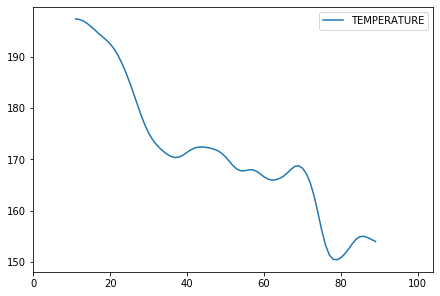

In [4]:
# execute this quick test query to see if everything works:
db.test_call().plot()

In [5]:
db.get_columns()

Index(['NLIMB', 'NNADIR', 'TNADIR', 'OBSDATE', 'OBSTIME', 'SCLK', 'LS',
       'LOCALTIME', 'SZA', 'SOLARLATITUDE', 'SOLARLONGITUDE', 'ELEVATION',
       'AZIMUTH', 'SPACECRAFTLATITUDE', 'SPACECRAFTLONGITUDE',
       'SPACECRAFTRADIUS', 'LIMBANGLE', 'SCENELATITUDE', 'SCENELONGITUDE',
       'SCENERADIUS', 'SCENEALTITUDE', 'NADIRDATE', 'NADIRTIME', 'NADIRSCLK',
       'NADIRLS', 'NADIRLOCALTIME', 'NADIRSZA', 'NADIRSOLARLAT',
       'NADIRSOLARLON', 'NADIRELEVATION', 'NADIRAZIMUTH', 'NADIRSCLATITUDE',
       'NADIRSCLONGITUDE', 'NADIRSCRADIUS', 'NADIRROTATIONANGLE',
       'NADIRLATITUDE', 'NADIRLONGITUDE', 'NADIRRADIUS', 'NADIRALTITUDE',
       'SCENESURFACERADIUS', 'SCENEAREOIDRADIUS', 'MARSRADIUS',
       'DUST_463_NAD_OD', 'DUST_463_NAD_OD_ERR', 'H2OICE_843_NAD_OD',
       'H2OICE_843_NAD_OD_ERR', 'H2OCOLUMN', 'H2OCOLUMNERROR',
       'CO2ICE_XXX_NAD_OD', 'CO2ICE_XXX_NAD_OD_ERR', 'SURFACETEMPERATURE',
       'SURFACETERROR', 'SURFACETGUESS', 'NEARSURFACET', 'NEARSURFACETERROR',
     

In [6]:
db.get_cols_by_date(["pressure", "temperature", "obstime"], "20070101")

Sending this request:
select pressure,temperature,obstime from mcs_data_2d where obsdate = 20070101


,PRESSURE,TEMPERATURE,OBSTIME
0,1878.932000,NaN,19.745
1,1658.152000,NaN,19.745
2,1463.314000,NaN,19.745
3,1291.370000,NaN,19.745
4,1139.630000,NaN,19.745
...,...,...,...
265330,0.007002,NaN,86360.836
265331,0.006179,NaN,86360.836
265332,0.005453,NaN,86360.836
265333,0.004812,NaN,86360.836


In [7]:
sql = """
select temperature, dust, latitude, longitude, obsdate
from mcs_data_2d
where pressure between 45 and 55
and obsdate between 20080830 and 20080920
"""

In [8]:
df = db.query(sql)
df

,TEMPERATURE,DUST,LATITUDE,LONGITUDE,OBSDATE
0,172.334,2.156700e-05,45.969,-157.800,20080830
1,174.031,5.589400e-04,24.131,-128.308,20080830
2,170.915,NaN,22.567,-128.536,20080830
3,167.967,NaN,21.041,-128.758,20080830
4,169.668,NaN,19.421,-128.986,20080830
...,...,...,...,...,...
58219,175.493,1.085100e-05,-46.731,82.409,20080920
58220,174.798,3.376900e-07,-48.373,82.067,20080920
58221,175.659,1.000000e-09,-50.020,81.723,20080920
58222,175.550,NaN,-51.670,81.358,20080920


In [9]:
%matplotlib widget

In [10]:
df.TEMPERATURE.plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …